# Diccionario de variables

- id_colaborador - Identificador único del colaborador.
- id_ultimo_jefe - Identificador único del que corresponde al jefe o responsable.
- seniority - 1: Para quienes no tienen personal a su cargo, 2: Para los que sí tienen.
- modalidad_trabajo - Es la modalidad de trabajo especificada en el contrato del colaborador.
- distancia_oficina - Es la distancia en kilómetros que debe recorrer el colaborador desde su hogar para llegar a su sede.
- dias_baja_salud - Es el número de días de bajas justificadas por enfermedad desde que inició labores.
- genero - Especifica si es Hombre o Mujer
- canal_reclutamiento - Indica el medio por el cual se dio el proceso de postulación.
- permanencia_promedio - Es el tiempo promedio en años que el colaborador duró en sus experiencias laborales anteriores.
- fecha_nacimiento - Es la fecha de nacimiento en formato dd/mm/aaaa.
- salario - Es el monto correspondiente a la remuneración mensual percibida.
- psi_score - Es el puntaje obtenido en el test psicométrico durante el proceso de selección.
- fecha_incorporación - Se refiere al día en el que el colaborador comienza oficialmente a trabajar en la empresa.
- estado_civil - Se refiere a la situación legal en términos de relaciones personales formales reconocidas por la ley.
- performance_score - Es el puntaje obtenido por el colaborador en su última evaluación trimestral si tuviera.
- abandono_6meses - Es igual a "0" si continua laborando ó "1" si ya dejó la compañía en sus primeros 6 meses

# Carga de Datos

In [194]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [195]:
# Tamano de las graficas
sns.set(
    rc={
        'figure.figsize':(9, 9)
    }
)

In [196]:
# Estilo de graficas
sns.set_theme(style="whitegrid")

In [197]:
# carga de datos
df = pd.read_csv('./train_data.csv', sep=';')
df.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses
0,100247,102074.0,1,Híbrida,1.760,1,Mujer,Ferias & Networking,1,25/11/1999,140011,99.0,75,25/01/2018,Soltero,0
1,103355,102115.0,1,Híbrida,0.760,2,Hombre,Ferias & Networking,2,16/10/1996,182774,99.0,81,24/07/2021,Soltero,1
2,100669,102060.0,1,Híbrida,4.950,3,Mujer,Referidos,11,29/01/1971,682106,96.0,74,13/07/2016,Viudo,0
3,103760,102062.0,1,Híbrida,13.030,2,Hombre,Linkedin,2,28/04/1992,270232,96.0,82,21/07/2014,Soltero,1
4,100965,102062.0,1,Híbrida,13.045,2,Hombre,Linkedin,2,3/05/1992,266804,95.0,82,22/07/2014,Soltero,0


In [198]:
# tamano del dataset
df.shape

(2152, 16)

# Tratamiento Valores Faltantes

In [199]:
# variables con sus respectivos valores faltantes
df.isnull().sum()

id_colaborador           0
id_ultimo_jefe          91
seniority                0
modalidad_trabajo        0
distancia_oficina        0
dias_baja_salud          0
genero                   0
canal_reclutamiento      0
permanencia_promedio     0
fecha_nacimiento         0
salario                  0
performance_score       68
psi_score                0
fecha_incorporacion      0
estado_civil             0
abandono_6meses          0
dtype: int64

Valores faltantes en las variables id_ultimo_jefe y preformance_score. Hay que revisar con cuidado para ver si hay alguna relacion entre los missing

In [200]:
# Codigo para correr las funciones de utils.ipynb
%run utils2.ipynb

In [201]:
# Cantidad de valores completos
v_complet = df.missing.number_complete()
v_complet

34273

In [202]:
# Cantidad de valores faltantes
v_missing = df.missing.number_missing()
v_missing

159

In [203]:
# Porcentaje de valores faltantes en el dataframe
pct_v = (v_missing/v_complet)*100
pct_v

0.4639220377556677

El 0.4% de los datos son valores faltantes, una cantidad bastante baja por lo que podria eliminarse los registros de manera directa. Apliquemos un EDA sobre los missing

In [204]:
# Tabla de registros con valores faltantes y completos
df.missing.missing_case_table()

,n_missing_in_case,n_cases,pct_case
0,0,1995,92.704461
1,1,155,7.202602
2,2,2,0.092937


In [205]:
# Analisis de intervalos consecutivos de variables donde se encuentran las missing
df.missing.missing_variable_run(variable='id_ultimo_jefe')

,run_length,is_na
0,105,complete
1,1,missing
2,80,complete
3,1,missing
4,298,complete
...,...,...
146,16,complete
147,1,missing
148,4,complete
149,1,missing


La tabla nos indica que los valores faltantes de **id_ultimo_jefe** estan dispersos, no siguen un patron.

In [206]:
# Analisis de intervalos consecutivos de variables donde se encuentran las missing
df.missing.missing_variable_run(variable='performance_score')

,run_length,is_na
0,605,complete
1,17,missing
2,1479,complete
3,51,missing


La tabla nos muestra que los missing de **performance_score** se encuentran concentrados en cierta zona de los registros por lo que requiere de un analisis mas exhaustivo

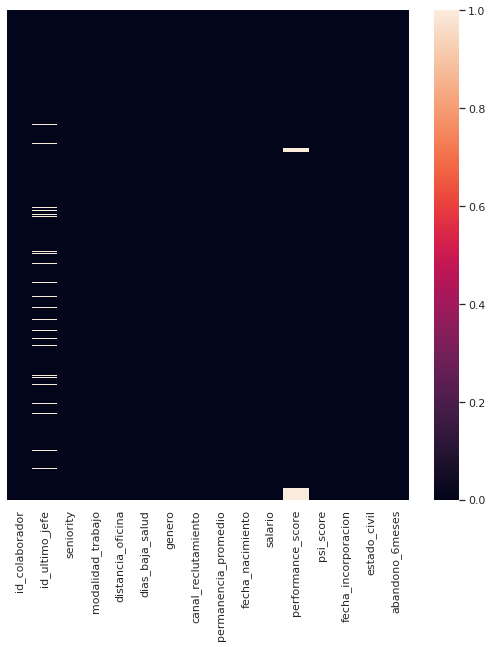

In [207]:
# heatmap de valores faltantes
sns.heatmap(df.isnull(), yticklabels=False);

Vemos que los valores faltantes estan contenidos en dos variables y que no estan relacionados entre si. Los missing de **id_ultimo_jefe** se encuentran dispersos mientras que los de **performance_score** se encuentran concentrados en ciertos registros por lo que requieren de un mayor analisis para ver si guarda alguna relacion con alguna otra variable

## Analisis de Valores Faltante en Performance_Score para variables categoricas

Vamos a analizar los registros con valores faltantes para ver si estos tienen que ver con alguna de las demas variables

In [208]:
missing_var = df[df['performance_score'].isna()]
missing_var.head()

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses
605,100119,102168.0,1,Híbrida,1.685,2,Mujer,Portal Web,1,28/05/2002,83583,NaN,82,13/10/2023,Soltero,1
606,100176,102172.0,1,Híbrida,1.555,9,Mujer,Linkedin,2,18/12/2001,96994,NaN,76,8/07/2023,Soltero,1
607,101962,102137.0,1,Híbrida,1.335,8,Mujer,Linkedin,5,1/05/1994,210572,NaN,73,4/09/2023,Soltero,1
608,100973,102172.0,1,Híbrida,1.255,12,Mujer,Portal Web,3,24/06/1988,324976,NaN,68,12/08/2023,Soltero,1
609,101216,102172.0,1,Híbrida,2.910,3,Hombre,Referidos,9,9/10/1987,349037,NaN,72,20/09/2023,Casado,0


### Distribucion de Genero


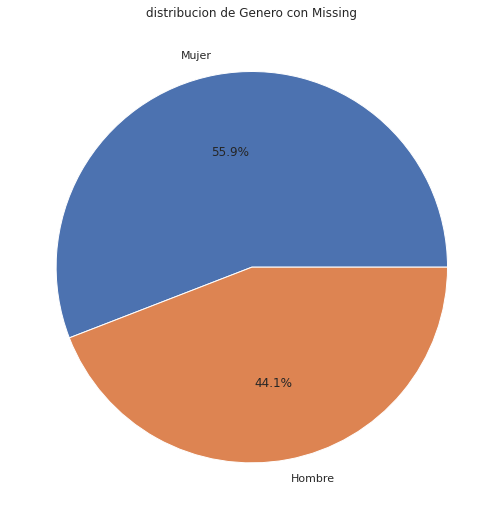

In [209]:
# Conteo de genero
genero_count = missing_var['genero'].value_counts()

# grafico
plt.pie(genero_count, labels=genero_count.index, autopct='%1.1f%%')
plt.title('distribucion de Genero con Missing');


### Distribucion Seniority

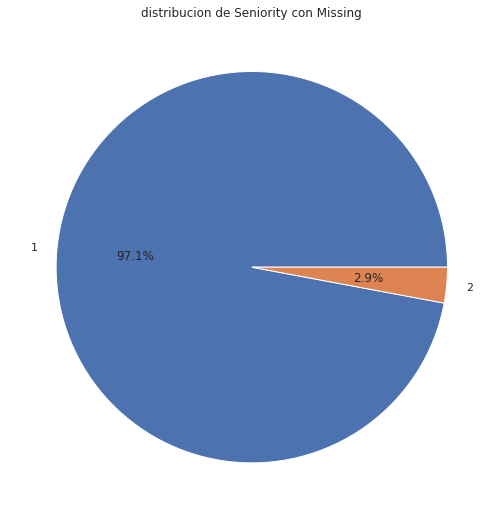

In [210]:
# Conteo seniority
seniority_count = missing_var['seniority'].value_counts()

# grafico
plt.pie(seniority_count, labels=seniority_count.index, autopct='%1.1f%%')
plt.title('distribucion de Seniority con Missing');

El grafico nos indica que en la mayoria de los registros con missing, los empleados no tienen personal a su cargo (1)

### Distribucion Ultimo Jefe

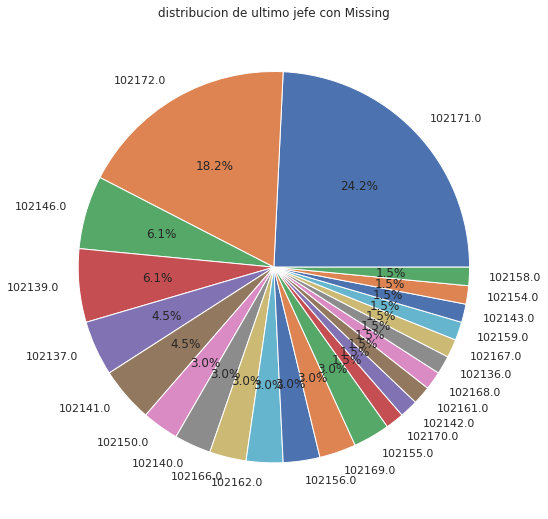

In [211]:
# Conteo seniority
jefeU_count = missing_var['id_ultimo_jefe'].value_counts()

# grafico
plt.pie(jefeU_count, labels=jefeU_count.index, autopct='%1.1f%%')
plt.title('distribucion de ultimo jefe con Missing');

### Distribucion canal

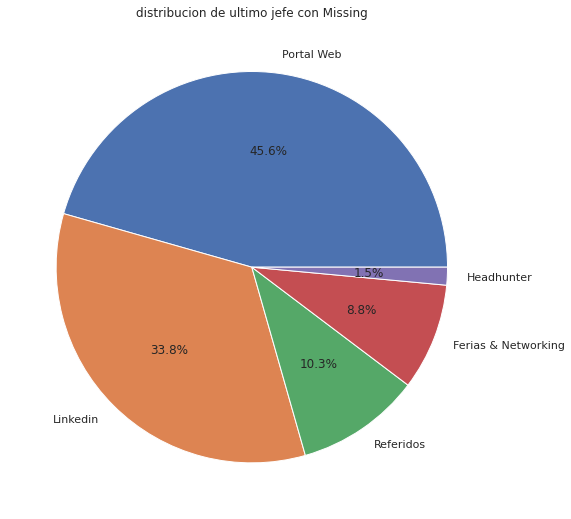

In [212]:
# Conteo seniority
canal_count = missing_var['canal_reclutamiento'].value_counts()

# grafico
plt.pie(canal_count, labels=canal_count.index, autopct='%1.1f%%')
plt.title('distribucion de ultimo jefe con Missing');

### Distribucion Modalidad Trabajo

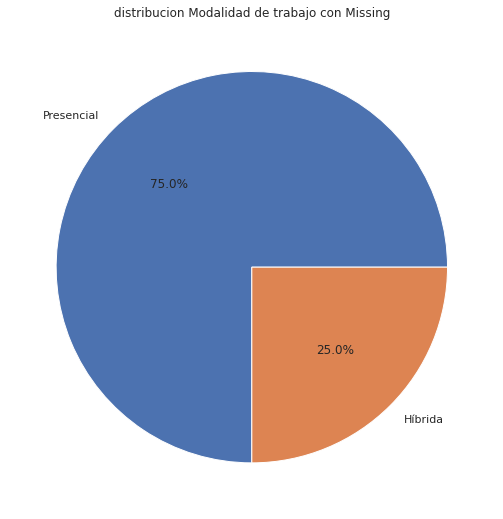

In [213]:
# Conteo seniority
trabajoM_count = missing_var['modalidad_trabajo'].value_counts()

# grafico
plt.pie(trabajoM_count, labels=trabajoM_count.index, autopct='%1.1f%%')
plt.title('distribucion Modalidad de trabajo con Missing');

Hay una gran cantidad de empleados en modalidad hibrida que no poseen performance score

### distribucion Abandono 6 meses

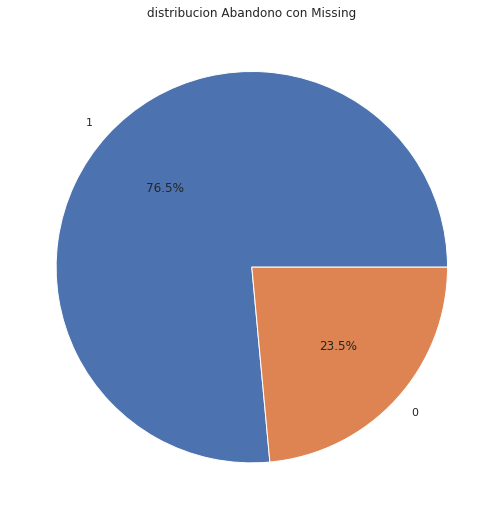

In [214]:
# Conteo seniority
abandono_count = missing_var['abandono_6meses'].value_counts()

# grafico
plt.pie(abandono_count, labels=abandono_count.index, autopct='%1.1f%%')
plt.title('distribucion Abandono con Missing');

La mayoria de los empleados que abandonan no posee un performance score

### distribucion Estado civil

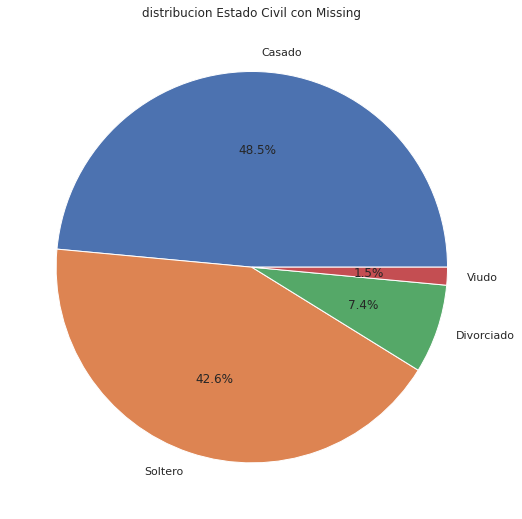

In [215]:
# Conteo seniority
estadoC_count = missing_var['estado_civil'].value_counts()

# grafico
plt.pie(estadoC_count, labels=estadoC_count.index, autopct='%1.1f%%')
plt.title('distribucion Estado Civil con Missing');

## Analisis de Valores Faltante en Performance_Score para variables numericas

### Matriz de sombra

In [216]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing = True)
)

,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,fecha_nacimiento,salario,performance_score,psi_score,fecha_incorporacion,estado_civil,abandono_6meses,id_ultimo_jefe_NA,performance_score_NA
0,100247,102074.0,1,Híbrida,1.760,1,Mujer,Ferias & Networking,1,25/11/1999,140011,99.0,75,25/01/2018,Soltero,0,Not Missing,Not Missing
1,103355,102115.0,1,Híbrida,0.760,2,Hombre,Ferias & Networking,2,16/10/1996,182774,99.0,81,24/07/2021,Soltero,1,Not Missing,Not Missing
2,100669,102060.0,1,Híbrida,4.950,3,Mujer,Referidos,11,29/01/1971,682106,96.0,74,13/07/2016,Viudo,0,Not Missing,Not Missing
3,103760,102062.0,1,Híbrida,13.030,2,Hombre,Linkedin,2,28/04/1992,270232,96.0,82,21/07/2014,Soltero,1,Not Missing,Not Missing
4,100965,102062.0,1,Híbrida,13.045,2,Hombre,Linkedin,2,3/05/1992,266804,95.0,82,22/07/2014,Soltero,0,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,103567,102171.0,1,Presencial,1.965,8,Mujer,Portal Web,3,20/12/1976,281159,NaN,65,22/12/2023,Casado,1,Not Missing,Missing
2148,104098,102172.0,1,Presencial,0.805,12,Mujer,Linkedin,13,23/10/1976,460337,NaN,82,26/07/2023,Casado,1,Not Missing,Missing
2149,103987,102155.0,1,Presencial,1.625,1,Hombre,Portal Web,11,19/03/1972,633879,NaN,66,24/07/2023,Soltero,1,Not Missing,Missing
2150,103810,102141.0,1,Presencial,5.665,2,Hombre,Portal Web,6,7/04/1971,793977,NaN,80,31/08/2023,Casado,1,Not Missing,Missing


### Performance Score vs Salario

In [217]:
# performance vs salario

print('Valores faltantes en la variable performance segun salario')
(
    df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['performance_score_NA'])             # agrupar por la ausencia de la variable Peso
    ['salario']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la variable performance segun salario


,performance_score_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,68.0,391656.220588,298562.291026,81009.0,190477.75,287253.0,466590.75,1616000.0
1,Not Missing,2084.0,459153.976008,302918.407862,76521.0,262306.25,377954.0,675161.75,1900000.0


<AxesSubplot:xlabel='performance_score_NA', ylabel='salario'>

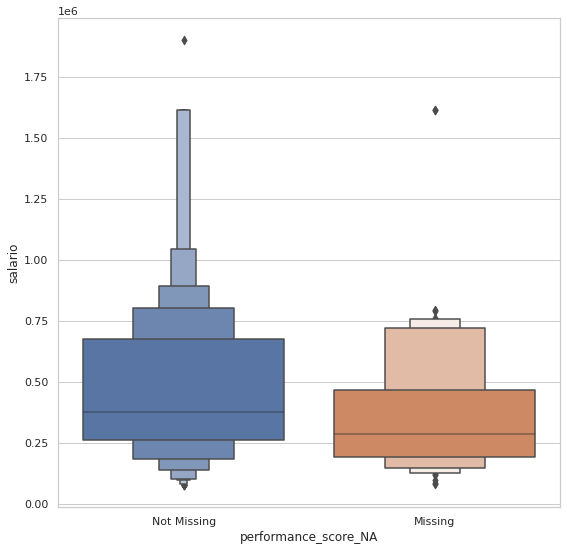

In [218]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .pipe(
        lambda df: (
            sns.boxenplot(                 # diagrama de caja
                data=df,                   # dataframe donde se encuentran las variables
                x='performance_score_NA',         # variable con los datos faltantes
                y='salario'                    # variable de comparacion
            )
        )   
    )
)

El salario de empleados con performance score es un poco mayor que el salario de los empleados que no poseen performance score 

### Performance Score vs Psi Score

In [219]:
# performance vs psi_score

print('Valores faltantes en la variable performance segun el genero')
(
    df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['performance_score_NA'])             # agrupar por la ausencia de la variable Peso
    ['psi_score']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la variable performance segun el genero


,performance_score_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,68.0,74.250000,5.898077,61.0,69.75,75.0,79.0,85.0
1,Not Missing,2084.0,75.320058,6.054304,58.0,71.00,75.0,79.0,98.0


<AxesSubplot:xlabel='performance_score_NA', ylabel='psi_score'>

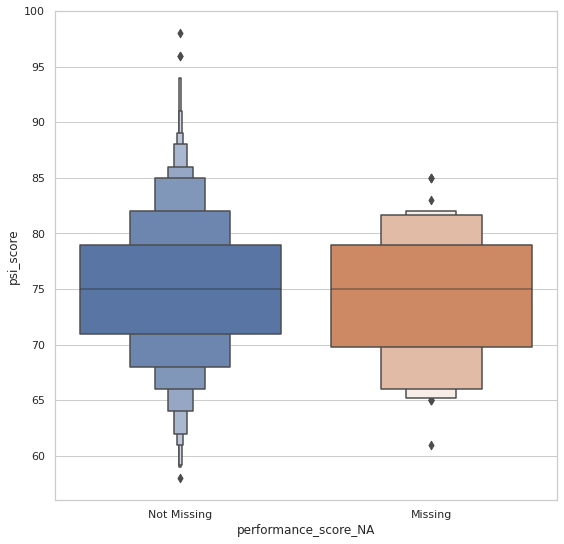

In [220]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .pipe(
        lambda df: (
            sns.boxenplot(                 # diagrama de caja
                data=df,                   # dataframe donde se encuentran las variables
                x='performance_score_NA',         # variable con los datos faltantes
                y='psi_score'                    # variable de comparacion
            )
        )   
    )
)

Los empleados con o sin valores faltantes en performance score poseen psi_score similares por tanto la presencia de missing no influyen en el performance

### Performance score vs Permanencia promedio

In [221]:
# performance vs permanencia promedio

print('Valores faltantes en la variable performance segun permanencia promedio')
(
    df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['performance_score_NA'])             # agrupar por la ausencia de la variable Peso
    ['permanencia_promedio']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la variable performance segun permanencia promedio


,performance_score_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,68.0,5.147059,3.782381,1.0,2.0,4.0,6.25,16.0
1,Not Missing,2084.0,6.693858,4.291172,1.0,3.0,6.0,9.00,25.0


<AxesSubplot:xlabel='performance_score_NA', ylabel='permanencia_promedio'>

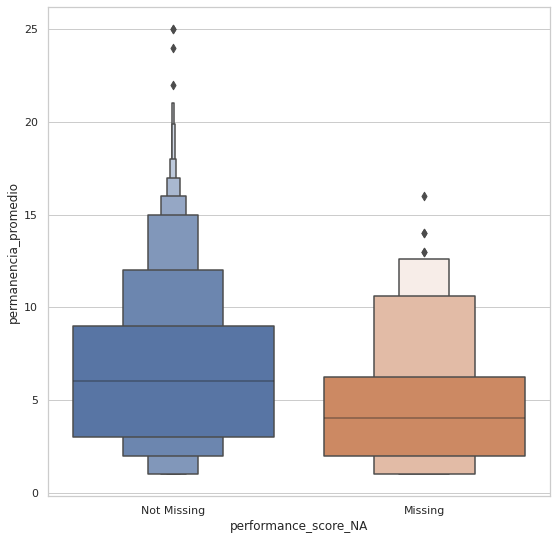

In [222]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .pipe(
        lambda df: (
            sns.boxenplot(                 # diagrama de caja
                data=df,                   # dataframe donde se encuentran las variables
                x='performance_score_NA',         # variable con los datos faltantes
                y='permanencia_promedio'                    # variable de comparacion
            )
        )   
    )
)

- Empleados con performance score tienden a durar mas de 5 años en el trabajo
- Empleados que no poseen performance score duran menos de 5 años en el trabajo en promedio

### Performance score vs Distancia oficina

In [223]:
# performance vs distancia_oficina

print('Valores faltantes en la variable performance segun Distancia a la oficina')
(
    df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['performance_score_NA'])             # agrupar por la ausencia de la variable Peso
    ['distancia_oficina']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la variable performance segun Distancia a la oficina


,performance_score_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,68.0,2.986103,1.624667,0.805,1.7675,2.6450,4.12625,6.48
1,Not Missing,2084.0,3.115869,1.794367,0.120,1.8200,2.5025,4.16000,21.05


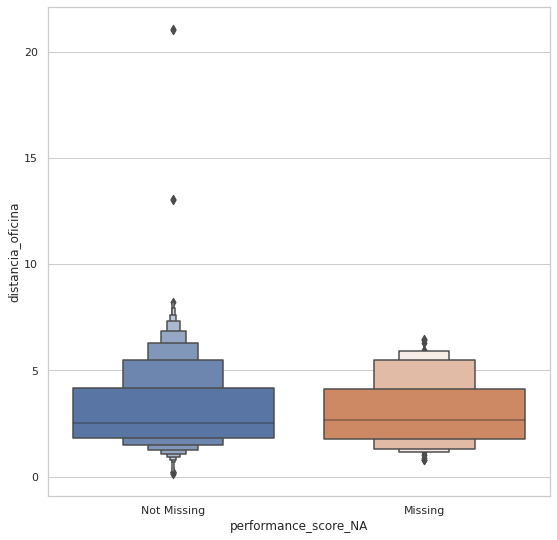

In [224]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .pipe(
        lambda df: (
            sns.boxenplot(                 # diagrama de caja
                data=df,                   # dataframe donde se encuentran las variables
                x='performance_score_NA',         # variable con los datos faltantes
                y='distancia_oficina'                    # variable de comparacion
            )
        )   
    )
);

El promedio de distancia a la oficina son muy similares tanto para empleados que poseen performance como los que no. Esto sugiere que la presencia de missing en performance no influye sobre la distancia a la que se encuentra la oficina

### Performance score vs Dias de bajas por salud

In [225]:
# performance vs dias de baja

print('Valores faltantes en la variable performance segun Dias de baja por salud')
(
    df
    .missing.bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .groupby(['performance_score_NA'])             # agrupar por la ausencia de la variable Peso
    ['dias_baja_salud']                                        # variable edad como referencia
    .describe()
    .reset_index()
)

Valores faltantes en la variable performance segun Dias de baja por salud


,performance_score_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,68.0,3.617647,3.416507,0.0,1.0,2.0,5.25,13.0
1,Not Missing,2084.0,2.679463,2.964009,0.0,1.0,2.0,3.00,35.0


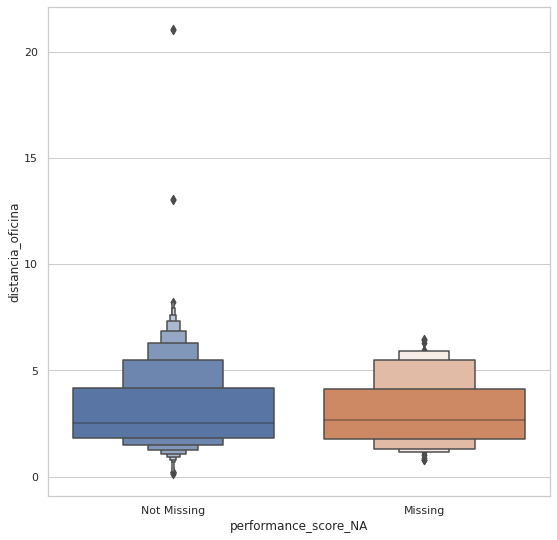

In [226]:
(
    df
    .missing
    .bind_shadow_matrix(only_missing=True) # crea la matriz de sombra
    .pipe(
        lambda df: (
            sns.boxenplot(                 # diagrama de caja
                data=df,                   # dataframe donde se encuentran las variables
                x='performance_score_NA',         # variable con los datos faltantes
                y='distancia_oficina'                    # variable de comparacion
            )
        )   
    )
);

El promedio de dias de baja por salud es similar para empleados con performance como sin performance por tanto la presencia de missing no influyen en los dias de baja por salud

## Obtener Edad de ingreso de los empleados

In [227]:
# convertimos las variables fecha_incorporacion y fecha_nacimiento en a tipo datetime

# fecha_incorporacion
df['fecha_incorporacion'] = pd.to_datetime(df['fecha_incorporacion'], format='%d/%m/%Y')

# fecha_nacimiento
df['fecha_nacimiento'] = pd.to_datetime(df['fecha_nacimiento'], format='%d/%m/%Y')

# crear variable year_nacimiento
df['year_nacimiento'] = df['fecha_nacimiento'].dt.year.astype(int)

# crear variable year_incorporacion
df['year_incorporacion'] = df['fecha_incorporacion'].dt.year.astype(int)

# eliminar fecha_incorporacion
df = df.drop('fecha_incorporacion', axis=1)

# eliminar fecha_nacimiento
df = df.drop('fecha_nacimiento', axis=1)

df['edad_ingreso'] = df['year_incorporacion'] - df['year_nacimiento']

# eliminar year_nacimiento
df = df.drop('year_nacimiento', axis=1)

# eliminar year_incorporacion
df = df.drop('year_incorporacion', axis=1)

# mostrar resultados
df.head()


,id_colaborador,id_ultimo_jefe,seniority,modalidad_trabajo,distancia_oficina,dias_baja_salud,genero,canal_reclutamiento,permanencia_promedio,salario,performance_score,psi_score,estado_civil,abandono_6meses,edad_ingreso
0,100247,102074.0,1,Híbrida,1.760,1,Mujer,Ferias & Networking,1,140011,99.0,75,Soltero,0,19
1,103355,102115.0,1,Híbrida,0.760,2,Hombre,Ferias & Networking,2,182774,99.0,81,Soltero,1,25
2,100669,102060.0,1,Híbrida,4.950,3,Mujer,Referidos,11,682106,96.0,74,Viudo,0,45
3,103760,102062.0,1,Híbrida,13.030,2,Hombre,Linkedin,2,270232,96.0,82,Soltero,1,22
4,100965,102062.0,1,Híbrida,13.045,2,Hombre,Linkedin,2,266804,95.0,82,Soltero,0,22


## Transformar Variables Categoricas

In [228]:
# nombre de las variables categoricas
categorical_v = (
    df.select_dtypes(include=[object, 'category']).columns
)

In [229]:
import sklearn.compose
import sklearn.impute
import sklearn.preprocessing


# funcion transformador 

categorical_transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(), categorical_v),
    remainder='passthrough'
)

categorical_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 Index(['modalidad_trabajo', 'genero', 'canal_reclutamiento', 'estado_civil'], dtype='object'))])

In [230]:
# dataframe transformado

(
    pd.DataFrame(
        categorical_transformer.fit_transform(df)
    )
)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,2.0,100247.0,102074.0,1.0,1.760,1.0,1.0,140011.0,99.0,75.0,0.0,19.0
1,0.0,0.0,0.0,2.0,103355.0,102115.0,1.0,0.760,2.0,2.0,182774.0,99.0,81.0,1.0,25.0
2,0.0,1.0,4.0,3.0,100669.0,102060.0,1.0,4.950,3.0,11.0,682106.0,96.0,74.0,0.0,45.0
3,0.0,0.0,2.0,2.0,103760.0,102062.0,1.0,13.030,2.0,2.0,270232.0,96.0,82.0,1.0,22.0
4,0.0,0.0,2.0,2.0,100965.0,102062.0,1.0,13.045,2.0,2.0,266804.0,95.0,82.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,1.0,1.0,3.0,0.0,103567.0,102171.0,1.0,1.965,8.0,3.0,281159.0,NaN,65.0,1.0,47.0
2148,1.0,1.0,2.0,0.0,104098.0,102172.0,1.0,0.805,12.0,13.0,460337.0,NaN,82.0,1.0,47.0
2149,1.0,0.0,3.0,2.0,103987.0,102155.0,1.0,1.625,1.0,11.0,633879.0,NaN,66.0,1.0,51.0
2150,1.0,0.0,3.0,0.0,103810.0,102141.0,1.0,5.665,2.0,6.0,793977.0,NaN,80.0,1.0,52.0


In [231]:
# agregar los nombre originales de cada variable
# agregar los indices

df_tra = (
    pd.DataFrame(
        categorical_transformer.fit_transform(df),
        columns=categorical_transformer.get_feature_names_out(), # obtener nombres
        index=df.index   # obtener indices
    )
    # eliminar prefijo de las variables
    .rename(
        columns=lambda x: x.replace('remainder__', '').replace('ordinalencoder__', '')
    )
)

df_tra


,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
0,0.0,1.0,0.0,2.0,100247.0,102074.0,1.0,1.760,1.0,1.0,140011.0,99.0,75.0,0.0,19.0
1,0.0,0.0,0.0,2.0,103355.0,102115.0,1.0,0.760,2.0,2.0,182774.0,99.0,81.0,1.0,25.0
2,0.0,1.0,4.0,3.0,100669.0,102060.0,1.0,4.950,3.0,11.0,682106.0,96.0,74.0,0.0,45.0
3,0.0,0.0,2.0,2.0,103760.0,102062.0,1.0,13.030,2.0,2.0,270232.0,96.0,82.0,1.0,22.0
4,0.0,0.0,2.0,2.0,100965.0,102062.0,1.0,13.045,2.0,2.0,266804.0,95.0,82.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,1.0,1.0,3.0,0.0,103567.0,102171.0,1.0,1.965,8.0,3.0,281159.0,NaN,65.0,1.0,47.0
2148,1.0,1.0,2.0,0.0,104098.0,102172.0,1.0,0.805,12.0,13.0,460337.0,NaN,82.0,1.0,47.0
2149,1.0,0.0,3.0,2.0,103987.0,102155.0,1.0,1.625,1.0,11.0,633879.0,NaN,66.0,1.0,51.0
2150,1.0,0.0,3.0,0.0,103810.0,102141.0,1.0,5.665,2.0,6.0,793977.0,NaN,80.0,1.0,52.0


In [232]:
df = df_tra.copy(deep=True)

## Imputacion KNN

In [233]:
df.isnull().sum()

modalidad_trabajo        0
genero                   0
canal_reclutamiento      0
estado_civil             0
id_colaborador           0
id_ultimo_jefe          91
seniority                0
distancia_oficina        0
dias_baja_salud          0
permanencia_promedio     0
salario                  0
performance_score       68
psi_score                0
abandono_6meses          0
edad_ingreso             0
dtype: int64

In [234]:
# librerias
import sklearn.impute
from sklearn.neighbors import KNeighborsRegressor
import sklearn.compose

# creamos el imputador con knn
knn_imputer = sklearn.impute.KNNImputer()

# copia del dataframe
df_knn = df.copy(deep=True)

# imputacion de los valores faltantes
df_knn.iloc[:, :] = knn_imputer.fit_transform(df).round()

df_knn.isnull().sum()


modalidad_trabajo       0
genero                  0
canal_reclutamiento     0
estado_civil            0
id_colaborador          0
id_ultimo_jefe          0
seniority               0
distancia_oficina       0
dias_baja_salud         0
permanencia_promedio    0
salario                 0
performance_score       0
psi_score               0
abandono_6meses         0
edad_ingreso            0
dtype: int64

# Invertir valor de Variables categoricas

In [235]:
(
    categorical_transformer # funcion que transforma los valores
    .named_transformers_    # nombre de las transformaciones realizadas a los datos
)

{'ordinalencoder': OrdinalEncoder(), 'remainder': 'passthrough'}

In [236]:
(
    categorical_transformer # funcion que transforma los valores
    .named_transformers_    # nombre de las transformaciones realizadas a los datos
    .ordinalencoder
)

OrdinalEncoder()

In [237]:
# las variables estan guardadas en categorical_columns
(
    categorical_transformer # funcion que transforma los valores
    .named_transformers_    # nombre de las transformaciones realizadas a los datos
    .ordinalencoder
    .inverse_transform(
        X=df_knn[categorical_v]
    )
)

array([['Híbrida', 'Mujer', 'Ferias & Networking', 'Soltero'],
       ['Híbrida', 'Hombre', 'Ferias & Networking', 'Soltero'],
       ['Híbrida', 'Mujer', 'Referidos', 'Viudo'],
       ...,
       ['Presencial', 'Hombre', 'Portal Web', 'Soltero'],
       ['Presencial', 'Hombre', 'Portal Web', 'Casado'],
       ['Presencial', 'Hombre', 'Linkedin', 'Casado']], dtype=object)

In [238]:
df_knn[categorical_v] = (
    categorical_transformer # funcion que transforma los valores
    .named_transformers_    # nombre de las transformaciones realizadas a los datos
    .ordinalencoder
    .inverse_transform(
        X=df_knn[categorical_v]
    )
)

df_knn

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
0,Híbrida,Mujer,Ferias & Networking,Soltero,100247.0,102074.0,1.0,2.0,1.0,1.0,140011.0,99.0,75.0,0.0,19.0
1,Híbrida,Hombre,Ferias & Networking,Soltero,103355.0,102115.0,1.0,1.0,2.0,2.0,182774.0,99.0,81.0,1.0,25.0
2,Híbrida,Mujer,Referidos,Viudo,100669.0,102060.0,1.0,5.0,3.0,11.0,682106.0,96.0,74.0,0.0,45.0
3,Híbrida,Hombre,Linkedin,Soltero,103760.0,102062.0,1.0,13.0,2.0,2.0,270232.0,96.0,82.0,1.0,22.0
4,Híbrida,Hombre,Linkedin,Soltero,100965.0,102062.0,1.0,13.0,2.0,2.0,266804.0,95.0,82.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Presencial,Mujer,Portal Web,Casado,103567.0,102171.0,1.0,2.0,8.0,3.0,281159.0,67.0,65.0,1.0,47.0
2148,Presencial,Mujer,Linkedin,Casado,104098.0,102172.0,1.0,1.0,12.0,13.0,460337.0,75.0,82.0,1.0,47.0
2149,Presencial,Hombre,Portal Web,Soltero,103987.0,102155.0,1.0,2.0,1.0,11.0,633879.0,68.0,66.0,1.0,51.0
2150,Presencial,Hombre,Portal Web,Casado,103810.0,102141.0,1.0,6.0,2.0,6.0,793977.0,61.0,80.0,1.0,52.0


In [239]:
df_knn.isnull().sum()

modalidad_trabajo       0
genero                  0
canal_reclutamiento     0
estado_civil            0
id_colaborador          0
id_ultimo_jefe          0
seniority               0
distancia_oficina       0
dias_baja_salud         0
permanencia_promedio    0
salario                 0
performance_score       0
psi_score               0
abandono_6meses         0
edad_ingreso            0
dtype: int64

In [240]:
# exportar data
#df_knn.to_csv('train_data_preparado2.csv', index=False)

# Imputacion MICE

In [241]:
df_mice = df.copy(deep=True)

In [242]:
# librerias
from sklearn.linear_model import BayesianRidge, Ridge
import sklearn.compose
import sklearn.impute
from sklearn.experimental import enable_iterative_imputer

In [243]:
# MICE en python es conocido como Iterative Imputer
mice_imputer = sklearn.impute.IterativeImputer(
    estimator = BayesianRidge(), # metodo bayesiano para estimar los missing
    initial_strategy='mean',
    imputation_order='ascending'
)

mice_imputer

IterativeImputer(estimator=BayesianRidge())

In [244]:
# ajuste, transformacion y sustitucion de los datos imputados
df_mice.iloc[:, :] = mice_imputer.fit_transform(df_mice).round()
df_mice

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
0,0.0,1.0,0.0,2.0,100247.0,102074.0,1.0,2.0,1.0,1.0,140011.0,99.0,75.0,0.0,19.0
1,0.0,0.0,0.0,2.0,103355.0,102115.0,1.0,1.0,2.0,2.0,182774.0,99.0,81.0,1.0,25.0
2,0.0,1.0,4.0,3.0,100669.0,102060.0,1.0,5.0,3.0,11.0,682106.0,96.0,74.0,0.0,45.0
3,0.0,0.0,2.0,2.0,103760.0,102062.0,1.0,13.0,2.0,2.0,270232.0,96.0,82.0,1.0,22.0
4,0.0,0.0,2.0,2.0,100965.0,102062.0,1.0,13.0,2.0,2.0,266804.0,95.0,82.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,1.0,1.0,3.0,0.0,103567.0,102171.0,1.0,2.0,8.0,3.0,281159.0,53.0,65.0,1.0,47.0
2148,1.0,1.0,2.0,0.0,104098.0,102172.0,1.0,1.0,12.0,13.0,460337.0,56.0,82.0,1.0,47.0
2149,1.0,0.0,3.0,2.0,103987.0,102155.0,1.0,2.0,1.0,11.0,633879.0,58.0,66.0,1.0,51.0
2150,1.0,0.0,3.0,0.0,103810.0,102141.0,1.0,6.0,2.0,6.0,793977.0,55.0,80.0,1.0,52.0


In [245]:
df_mice.isnull().sum()

modalidad_trabajo       0
genero                  0
canal_reclutamiento     0
estado_civil            0
id_colaborador          0
id_ultimo_jefe          0
seniority               0
distancia_oficina       0
dias_baja_salud         0
permanencia_promedio    0
salario                 0
performance_score       0
psi_score               0
abandono_6meses         0
edad_ingreso            0
dtype: int64

In [246]:
# crear matriz de sombra de missing
df_mice_s = (
    pd.concat(
        [
            df_mice,
            df_mice.missing.create_shadow_matrix2(
                True,
                False,
                only_missing=False,
                suffix='_imp',
            )
        ],
        axis=1
    )
)

df_mice_s

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,...,id_ultimo_jefe_imp,seniority_imp,distancia_oficina_imp,dias_baja_salud_imp,permanencia_promedio_imp,salario_imp,performance_score_imp,psi_score_imp,abandono_6meses_imp,edad_ingreso_imp
0,0.0,1.0,0.0,2.0,100247.0,102074.0,1.0,2.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.0,0.0,2.0,103355.0,102115.0,1.0,1.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,0.0,1.0,4.0,3.0,100669.0,102060.0,1.0,5.0,3.0,11.0,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.0,2.0,2.0,103760.0,102062.0,1.0,13.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.0,2.0,2.0,100965.0,102062.0,1.0,13.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,1.0,1.0,3.0,0.0,103567.0,102171.0,1.0,2.0,8.0,3.0,...,False,False,False,False,False,False,False,False,False,False
2148,1.0,1.0,2.0,0.0,104098.0,102172.0,1.0,1.0,12.0,13.0,...,False,False,False,False,False,False,False,False,False,False
2149,1.0,0.0,3.0,2.0,103987.0,102155.0,1.0,2.0,1.0,11.0,...,False,False,False,False,False,False,False,False,False,False
2150,1.0,0.0,3.0,0.0,103810.0,102141.0,1.0,6.0,2.0,6.0,...,False,False,False,False,False,False,False,False,False,False


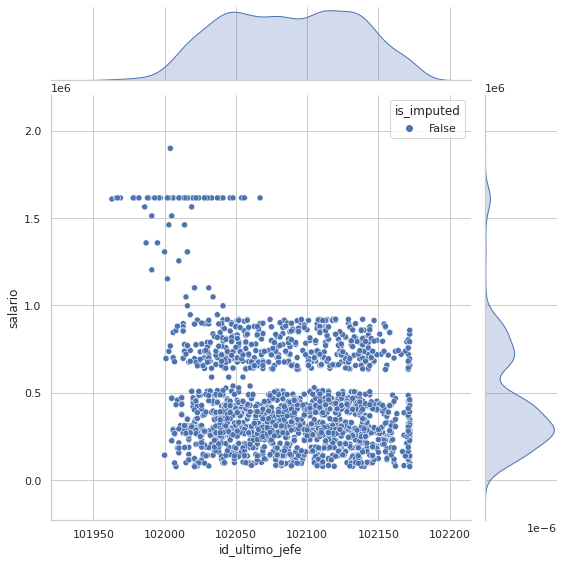

In [247]:
df_mice_s.missing.scatter_imputation_plot(
    x='id_ultimo_jefe',
    y='salario',
    show_marginal = True,   # muestra la distribucion a los costado
    height = 8             # tamano del grafico
)

# Invertir valor de variables categoricas

In [249]:
(
    categorical_transformer # funcion que transforma los valores
    .named_transformers_    # nombre de las transformaciones realizadas a los datos
    .ordinalencoder
)

OrdinalEncoder()

In [250]:
# las variables estan guardadas en categorical_columns
(
    categorical_transformer # funcion que transforma los valores
    .named_transformers_    # nombre de las transformaciones realizadas a los datos
    .ordinalencoder
    .inverse_transform(
        X=df_mice[categorical_v]
    )
)

array([['Híbrida', 'Mujer', 'Ferias & Networking', 'Soltero'],
       ['Híbrida', 'Hombre', 'Ferias & Networking', 'Soltero'],
       ['Híbrida', 'Mujer', 'Referidos', 'Viudo'],
       ...,
       ['Presencial', 'Hombre', 'Portal Web', 'Soltero'],
       ['Presencial', 'Hombre', 'Portal Web', 'Casado'],
       ['Presencial', 'Hombre', 'Linkedin', 'Casado']], dtype=object)

In [251]:
df_mice[categorical_v] = (
    categorical_transformer # funcion que transforma los valores
    .named_transformers_    # nombre de las transformaciones realizadas a los datos
    .ordinalencoder
    .inverse_transform(
        X=df_mice[categorical_v]
    )
)

df_mice

,modalidad_trabajo,genero,canal_reclutamiento,estado_civil,id_colaborador,id_ultimo_jefe,seniority,distancia_oficina,dias_baja_salud,permanencia_promedio,salario,performance_score,psi_score,abandono_6meses,edad_ingreso
0,Híbrida,Mujer,Ferias & Networking,Soltero,100247.0,102074.0,1.0,2.0,1.0,1.0,140011.0,99.0,75.0,0.0,19.0
1,Híbrida,Hombre,Ferias & Networking,Soltero,103355.0,102115.0,1.0,1.0,2.0,2.0,182774.0,99.0,81.0,1.0,25.0
2,Híbrida,Mujer,Referidos,Viudo,100669.0,102060.0,1.0,5.0,3.0,11.0,682106.0,96.0,74.0,0.0,45.0
3,Híbrida,Hombre,Linkedin,Soltero,103760.0,102062.0,1.0,13.0,2.0,2.0,270232.0,96.0,82.0,1.0,22.0
4,Híbrida,Hombre,Linkedin,Soltero,100965.0,102062.0,1.0,13.0,2.0,2.0,266804.0,95.0,82.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,Presencial,Mujer,Portal Web,Casado,103567.0,102171.0,1.0,2.0,8.0,3.0,281159.0,53.0,65.0,1.0,47.0
2148,Presencial,Mujer,Linkedin,Casado,104098.0,102172.0,1.0,1.0,12.0,13.0,460337.0,56.0,82.0,1.0,47.0
2149,Presencial,Hombre,Portal Web,Soltero,103987.0,102155.0,1.0,2.0,1.0,11.0,633879.0,58.0,66.0,1.0,51.0
2150,Presencial,Hombre,Portal Web,Casado,103810.0,102141.0,1.0,6.0,2.0,6.0,793977.0,55.0,80.0,1.0,52.0


In [252]:
df_mice.isnull().sum()

modalidad_trabajo       0
genero                  0
canal_reclutamiento     0
estado_civil            0
id_colaborador          0
id_ultimo_jefe          0
seniority               0
distancia_oficina       0
dias_baja_salud         0
permanencia_promedio    0
salario                 0
performance_score       0
psi_score               0
abandono_6meses         0
edad_ingreso            0
dtype: int64

In [254]:
# exportar datos preparados
#df_mice.to_csv('train_data_preparado3.csv', index=False)